# Convert .Rmd to .ipynb


In [1]:
# install.packages("devtools")
# remove.packages("rlang")
# install.packages("rlang")
# devtools::install_github("mkearney/rmd2jupyter")
# install.packages("rmd2jupyter")
# library("rmd2jupyter")

In [2]:
# rmd to ipynb
# rmd2jupyter("Preprocessing Data for Meta-Analyses.Rmd")

In [3]:
# install.packages("rmarkdown")

# Preprocess data of raw covidence Export



In [4]:
raw.df <- read.csv("final_data_export.csv")


## Install and load Dplyr


In [5]:
# install.packages("dplyr")
library("dplyr")
install.packages("sjmisc")
library("sjmisc")
# for data manipulation with dplyr see: https://www.youtube.com/watch?v=Gvhkp-Yw65U
# for splitting 2 values in 1 cell see: https://www.youtube.com/watch?v=DiY8EqZDwoI at 3:17 (e.g. if 2 scales for 1 outcome)
# for joining 2 data frames see:        https://www.youtube.com/watch?v=DiY8EqZDwoI at 11:57


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘datawizard’, ‘insight’, ‘sjlabelled’




In [6]:
my.raw.df <- raw.df %>%
  filter(Reviewer.Name == "Robin Jacob", Study.design == "Passive RCT")

## Drop unimportant columns by name

### Remove column rages (first columns)

In [7]:
my.df <- my.raw.df %>%
  select(-Reviewer.Name:-Further.Information.inserted.in.Extraction.Form.)  # "-" indicates deleting these columns

### Remove single column names and repeating names with ascending numbers (table headlines)


In [8]:
cols.pop.char <- c()

for (time.point in 0:4){
  cols.pop.char <- append(cols.pop.char,
                          sprintf("Population.Characteristics..Time.Point.%d..",
                                  time.point
                                  )
                          )
}

cols.outc.t <- c()

for (outc in 1:7){
  for (t in 0:3){
    cols.outc.t <- append(cols.outc.t,
                          sprintf("Outcome.%d..Time.Point.%d..",
                                  outc, t
                                  )
                          )
  }
}

cols.quant.results <- c()

i <- 0
for (int.1 in 1:3){
  i <- i + 1
  if (i == 1){
    for (int.2 in 2:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 2){
    for (int.2 in 3:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 3){
    int.2 <- 4
    for (t in 1:3){
      cols.quant.results <- append(cols.quant.results,
                            sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                    int.1, int.2, t
                                    )
                            )
    }
  } else {
    print("i not = 1, 2, or 3")
  }
}

remove.cols <- c(cols.pop.char[],
                 "Dates.of.Measuring.Time.Points.",
                 "Between.Measuring.Time.Points..Duration.",
                 "Intervention.and.Comparisons.",
                 "Definition.of.Outcomes.",
                 "Measures.of.Outcomes.",
                 cols.outc.t[],
                 cols.quant.results[],
                 "Results.of.Key.Themes."
                 )

my.df <- my.df[, ! names(my.df) %in% remove.cols]

In [9]:
# set options to print entire df (extend max. rows end cols)
options(repr.matrix.max.rows=30, repr.matrix.max.cols=1100)

In [10]:
my.df

Covidence.. Study.ID                
1  4325        Ratanasiripong 2015     
2  4178        Sloan 2016              
3  3762        Nidich 2009             
4  3760        Barry 2019              
5  3759        Chen 2013               
6  3736        Warnecke 2011           
7  2925        Johnson-Waddell 2018    
8  2864        Plummer 2018            
9  2574        Janowiak 1994           
10 2416        Oman 2007               
11 2267        Weytens 2014            
12 2201        Bonamo 2015             
13 2075        Smith 2021              
14 1897        Wang 2021               
15 1889        Fish 2019               
16 1737        Siembor 2018            
17 1582        Lee 2018                
18 1574        Bultas 2021             
19 1469        Huberty 2019            
20 1416        Tanner 2009             
21 1329        deGrace 1976            
22 1322        Messer 2016             
23 1259        Vasiliauskas 2013       
24 1225        Nolan 2020              
25 1159        Dorais 2021             
26  361        Toole 2016              
27  122        Schulte-Frankenfeld 2021
   Title                                                                                                                                                                                            
1  Stress and Anxiety Management in Nursing Students: Biofeedback and Mindfulness Meditation                                                                                                        
2  Self-perceived stress of undergraduate students before and after participation in a breathing meditation intervention: A mixed methods study                                                     
3  A randomized controlled trial on effects of the Transcendental Meditation program on blood pressure, psychological distress, and coping in young adults                                          
4  A randomized controlled trial of the effects of mindfulness practice on doctoral candidate psychological status                                                                                  
5  A randomized controlled trial of the effects of brief mindfulness meditation on anxiety symptoms and systolic blood pressure in Chinese nursing students                                         
6  A randomised controlled trial of the effects of mindfulness practice on medical student stress levels                                                                                            
7  Mindfulness meditation's effect on college/university students' mindfulness and transformational leadership                                                                                      
8  Mindfulness in a Graduate Nursing Curriculum: A Randomized Controlled Study                                                                                                                      
9  Meditation and college students' self-actualization and rated stress                                                                                                                             
10 Learning from spiritual models and meditation: A randomized evaluation of a college course                                                                                                       
11 An integrative theory-driven positive emotion regulation intervention                                                                                                                            
12 The influence of a brief mindfulness exercise on encoding of novel words in female college students                                                                                              
13 Impact of App-Delivered Mindfulness Meditation on Functional Connectivity, Mental Health, and Sleep Disturbances Among Physician Assistant Students: Randomized, Wait-list Controlled Pilot Study
14 Gender differences in the benefits of meditation training on attentional blink                                            


## Create arrays and data frame lists from Covidence tables



### Set basic parameters


In [11]:
nm.placeholder <- -999  # placeholder for values marked as nm (not mentioned)

flag.x.s.r <- 2
  # x.s.r = exact value (0), mean s (1), or mean r (2)
  # flag.x.s.r = 2 --> include all
  # flag.x.s.r = 1 --> only include mean s and exact values
  # flag.x.s.r = 0 --> include only exact vaules

study.no <- length(my.df[,"Study.ID"])

### Functions

#### Checking for digits and characters

In [12]:
# function returning TRUE if string contains no characters but digits instead
no.char.but.digit.inside <- function(value){
  !(str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")) &
  grepl("\\d", value)
}

# function returning TRUE if string contains characters
char.inside <- function(value){
  str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")
}

In [13]:
char.inside("mindfulness meditation")

[1] TRUE


#### For mean values


In [14]:
# extracts mean r and mean s values as double
get.all.means <- function(value){
  if (grepl("mean r", value)){
    extracted.value <- as.double(sub(" mean r.*", "", value))
        # extracts anything before " mean r" as double                 
  } else if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}

# extracts mean s only as double
get.mean.s.only <- function(value){
    if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean r", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean r")
    cat("\n")
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}


#### Convert value from nm, NA, digit, or char


In [15]:
convert.value <- function(value, nm.placeholder, only.double = TRUE){
  na.value <- FALSE
  if (is.na(value)){
    na.value <- TRUE
  }
  if (na.value == TRUE){
    extracted.value <- NA
  } else {
    value <- as.character(value)
    if (value == "nm"){
      extracted.value <- nm.placeholder
    } else if (value == ""){
      extracted.value <- NA
    } else if (value == "^"){
      extracted.value <- value
        # extracts value after "<" as double 
    } else if (grepl("<", value)){
      extracted.value <- as.double(sub(".*<", "", value))
        # extracts value after "<" as double 
    } else if (grepl(">", value)){
      extracted.value <- as.double(sub(".*>", "", value))
    } else if (no.char.but.digit.inside(value)){
      if (grepl(",", value)){
        cat("decimal separator replaced with point in ", value)
        extracted.value <- as.double(sub(",", ".", value))
          # sub(a, b, value) replaces a with b in value
      } else if (grepl("-", value)){
        # like "0 - 40"
        extracted.value <- value
      } else {
        extracted.value <- as.double(value) 
      }
    } else if (char.inside(value)){
      if (flag.x.s.r == 2){
        extracted.value <- get.all.means(value)
      } else if (flag.x.s.r == 1){
        extracted.value <- get.mean.s.only(value)
      } else if ((flag.x.s.r == 0) & !(grepl("mean r", value) | grepl("mean s", value))){
        extracted.value <- NA
        if (grepl("mean", value)){
          cat("value not added because mean only: ", value)
          cat("\n")
        }
      } else {
        if (only.double == TRUE){
          extracted.value <- NA
          cat("unknown case with char inside: ", value)
          cat("\n")
        } else {
          extracted.value <- value
        }
      }
    } else {
      cat("unknown case: ", value)
      cat("\n")
    }
  }
  extracted.value
}

#### Check if multiple commas are present in string

In [16]:
multiple.commas.present <- function(input.string){
  multiple.commas.present <- FALSE
  comma.count <- 0

  iterable.string <- tryCatch(
    {
      strsplit(input.string, "")[[1]]
        # strsplit(input.string, "")[[1]] makes string iterable
        # try part
    },
    error=function(cond) {
      message(paste("Error of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      # message(cond)
      return("")
      # except part fort errors
    },
    warning=function(cond) {
      message(paste("Warning of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      # message(cond)
      return("")
      # except part fort warnings
    }
  )
    # see following link for exception handling: https://stackoverflow.com/questions/12193779/how-to-write-trycatch-in-r

  for (i in iterable.string){  
    if (i == ","){
      comma.count <- comma.count + 1
    }
  }
  if (comma.count > 1){
    multiple.commas.present <- TRUE
  }
  multiple.commas.present
}


#### For arrays


In [17]:
clean.and.shape.data.to.array <- function(
  my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
  ){
  my.array <- array(rep(NA),
                    dim = dims,
                    dimnames = dimname.list
                    )
  my.data <- my.df %>%
    select(start:end)
  
  if (length(dims) == 6){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (dim.4.elmnt in 1:dims[4]){
        for (mtrx in 1:dims[3]){
          for (row in 1:dims[1]){
            for (col in 1:dims[2]){
              value <- my.data[study, my.data.col.no]
              my.data.col.no <- my.data.col.no + 1
              if (grepl(",", value)){
                if (!multiple.commas.present(value)){
                  value.before.comma <- sub(",.*", "", value)
                    # extracts anything before "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                    value.before.comma, nm.placeholder
                    )
                  value.after.comma <- sub(".*,", "", value)
                    # extracts anything after "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 2, study] <- convert.value(
                    value.after.comma, nm.placeholder
                    )
                } else {
                    cat(value, "has multiple commas, find solution")
                  }
              } else {
                my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                  value, nm.placeholder
                  )
              }
            }
          }
        }
      }
    }
  } else if (length(dims) == 5){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (mtrx in 1:dims[3]){
        for (row in 1:dims[1]){
          for (col in 1:dims[2]){
            value <- my.data[study, my.data.col.no]
            my.data.col.no <- my.data.col.no + 1
            if (grepl(",", value)){
              if (!multiple.commas.present(value)){
                value.before.comma <- (sub(",.*", "", value))
                  # extracts anything before "," as double
                my.array[row, col, mtrx, 1, study] <- convert.value(
                  value.before.comma, nm.placeholder
                  )
                value.after.comma <- (sub(".*,", "", value))
                  # extracts anything after "," as double
                my.array[row, col, mtrx, 2, study] <- convert.value(
                  value.after.comma, nm.placeholder
                  )
              } else {
                  cat(value, "has multiple commas, find solution")
                }
            } else {
              my.array[row, col, mtrx, 1, study] <- convert.value(
                value, nm.placeholder
                )
            }
          }
        }
      }
    }
  } else if (length(dims) <= 4){
    print("too low dim, use function for data frame")
  }
  my.array
}


#### For data frame lists


In [18]:
# create data frames out of 2D Tables (with rows and cols swapped)
clean.data.to.df.list.swap <- function(
  my.df, start, end, dims, list.names, dimname.list, check.multiple.commas = FALSE
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(list.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- list.names
  
  my.data <- my.df %>%
    select(start:end)
  
  # vector of my.data.col.no to swapped rows and cols of Covidence output
  my.data.col.no.swapped <- c()
  i <- 0
  j <- 1
  for (k in 1:dims[1]){
    i <- 0
    for (l in 1:dims[2]){
      my.data.col.no.swapped <- append(my.data.col.no.swapped, i * dims[1] + j)
      i <- i + 1
    }
    j <- j + 1 
  }
  # dims[1] = rows new, cols old
  # dims[2] = cols new, rows old
  
  # e.g., filling pattern for old 4 x 7 and new 7 x 4 data frame 
  ## 1, dims[1]+1, 2*dims[1]+1, 3*dims[1]+1, 4*dims[1]+1, 5*dims[1]+1, 6*dims[1]+1,
  ## 2, dims[1]+2, 2*dims[1]+2, 3*dims[1]+2, 4*dims[1]+2, 5*dims[1]+2, 6*dims[1]+2,
  ## x, x, x, x, x, x, x,
  ## x, x, x, x, x, x, x
  
  for (study in 1:study.no){
    m <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no.swapped[m]]
        m <- m + 1

        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE
          )
      }
    }
  }
  study.df.list
}


In [19]:
# create data frames out of 2D Tables
clean.data.to.df.list <- function(
  my.df, start, end, dims, list.names, dimname.list, check.multiple.commas = FALSE
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(list.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- list.names
  
  my.data <- my.df %>%
    select(start:end)
  
  for (study in 1:study.no){
    my.data.col.no <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no]
        my.data.col.no <- my.data.col.no + 1
        
        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE
          )
      }
    }
  }
  study.df.list
}


#### Print arrays

In [20]:
print.array.not.na <- function(input.array){
  if (length(dim(input.array)) == 6){
    for (dim.6.element in 1:dim(input.array)[6]){
      cat("\n###### ", dimnames(input.array)[[6]][dim.6.element], " ######")
      for (dim.5.element in 1:dim(input.array)[5]){
        cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
        for (dim.4.element in 1:dim(input.array)[4]){
          cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
          for (mtrx in 1:dim(input.array)[3]){
            mtrx.is.na <- TRUE
            for (col in 1:dim(input.array)[2]){
              for (row in 1:dim(input.array)[1]){
                if (!is.na(input.array[
                  row, col, mtrx, dim.4.element, dim.5.element, dim.6.element
                                      ]
                          )
                   ){
                     mtrx.is.na <- FALSE
                }
              }
            }
            if (mtrx.is.na == FALSE){
              print(dimnames(input.array)[[3]][mtrx])
              print(input.array[,,mtrx, dim.4.element, dim.5.element, dim.6.element])
              cat("\n")
            }
          } 
        }
      }
    }
  } else if (length(dim(input.array)) == 5){
    for (dim.5.element in 1:dim(input.array)[5]){
      cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
      for (dim.4.element in 1:dim(input.array)[4]){
        cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
        for (mtrx in 1:dim(input.array)[3]){
          mtrx.is.na <- TRUE
          for (col in 1:dim(input.array)[2]){
            for (row in 1:dim(input.array)[1]){
              if (!is.na(input.array[
                row, col, mtrx, dim.4.element, dim.5.element
                                    ]
                        )
                  ){
                    mtrx.is.na <- FALSE
              }
            }
          }
          if (mtrx.is.na == FALSE){
            print(dimnames(input.array)[[3]][mtrx])
            print(input.array[,,mtrx, dim.4.element, dim.5.element])
            cat("\n")
          }
        } 
      }
    } 
  } else if (length(dim(input.array)) == 4){
    for (dim.4.element in 1:dim(input.array)[4]){
      cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
      for (mtrx in 1:dim(input.array)[3]){
        mtrx.is.na <- TRUE
        for (col in 1:dim(input.array)[2]){
          for (row in 1:dim(input.array)[1]){
            if (!is.na(input.array[
              row, col, mtrx, dim.4.element
                                  ]
                      )
                ){
                  mtrx.is.na <- FALSE
            }
          }
        }
        if (mtrx.is.na == FALSE){
          print(dimnames(input.array)[[3]][mtrx])
          print(input.array[,,mtrx, dim.4.element])
          cat("\n")
        }
      } 
    }
  } else if (length(dim(input.array)) == 3){
    for (mtrx in 1:dim(input.array)[3]){
      mtrx.is.na <- TRUE
      for (col in 1:dim(input.array)[2]){
        for (row in 1:dim(input.array)[1]){
          if (!is.na(input.array[
            row, col, mtrx
                                ]
                    )
              ){
                mtrx.is.na <- FALSE
          }
        }
      }
      if (mtrx.is.na == FALSE){
        print(dimnames(input.array)[[3]][mtrx])
        print(input.array[,,mtrx])
        cat("\n")
      }
    }
  } else {
    print("unknown case")
  }
}

### Arrays


#### Population Characteristics

In [21]:
dims <- c(4, 5, 4, 2, study.no)

dimname.list <- list(c("No.Participants", "Mean.Age", "No.Females", "No.Males"),
                     c("Intervention.1", "Intervention.2", "Intervention.3", "Intervention.4", "Over.All"),
                     c("T0", "T1", "T2", "T3"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Number.of.Participants.Intervention.1.T0"
end <- "Number.of.Males.Over.All.T3"

population.characteristics.array <- clean.and.shape.data.to.array(
  my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)

my.df <- my.df %>%
  select(-Number.of.Participants.Intervention.1.T0:-Number.of.Males.Over.All.T3)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(start)` instead of `start` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(end)` instead of `end` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


#### Results Descriptive

In [22]:
dims <- c(4, 3, 4, 7, 2, study.no)

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Mean", "SD", "n"),
                     c("T0", "T1", "T2", "T3"),
                     c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Intervention.1.Mean.O1T0"
end <- "Control.or.Intervention.4.n.in.case.of.period.O7T3"

results.descriptive.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)

my.df <- my.df %>%
  select(-Intervention.1.Mean.O1T0:-Control.or.Intervention.4.n.in.case.of.period.O7T3)

In [23]:
# use my.pop.char.array[,,"T0","Johnson-Waddell 2018"] as test for "", NA, "nm", "double"
#      [,1]  [,2] [,3] [,4]  [,5]
# [1,] "197" NA   NA   "197" 394 
# [2,] ""    ""   NA   ""    "nm"
# [3,] ""    NA   NA   ""    "nm"
# [4,] ""    NA   NA   ""    "" 
# make flag.x.s.r work --> done


In [24]:
results.descriptive.array[,,,"Outcome.1","Scale.1","Ratanasiripong 2015"]

, , T0

                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 17.24 4.16 NA
Intervention.3    NA   NA NA
Control        17.29 3.50 NA

, , T1

                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 14.90 3.44 NA
Intervention.3    NA   NA NA
Control        16.74 4.71 NA

, , T2

               Mean SD  n
Intervention.1   NA NA NA
Intervention.2   NA NA NA
Intervention.3   NA NA NA
Control          NA NA NA

, , T3

               Mean SD  n
Intervention.1   NA NA NA
Intervention.2   NA NA NA
Intervention.3   NA NA NA
Control          NA NA NA

In [25]:
print.array.not.na(results.descriptive.array)


######  Ratanasiripong 2015  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 17.24 4.16 NA
Intervention.3    NA   NA NA
Control        17.29 3.50 NA

[1] "T1"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 14.90 3.44 NA
Intervention.3    NA   NA NA
Control        16.74 4.71 NA


# Outcome.2 
[1] "T0"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 25.45 7.80 NA
Intervention.3    NA   NA NA
Control        23.74 7.72 NA

[1] "T1"
                Mean   SD  n
Intervention.1 21.28 6.95 NA
Intervention.2    NA   NA NA
Intervention.3    NA   NA NA
Control        24.74 9.91 NA


# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

###  Scale.2  ###
# Outcome.1 

# Outcome.2 

# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

######  Sloan 2016  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                  Mean      SD  n
Interventi


#### Results Quantitative


In [26]:
dims <- c(7, 3, 3, 6, 2, study.no)

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("P.Value", "Effect.Size", "Effect.Size.CI"),
                     c("T1", "T2", "T3"),
                     c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Outcome.1.P.Value.1x2T1"
end <- "Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3"

results.quantitative.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)
my.df <- my.df %>%
  select(-Outcome.1.P.Value.1x2T1:-Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3)

### Data frame lists

#### Intervention Comparison

In [27]:
dims <- c(4, 7)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes",
                       "Frequency.in.times.per.week", "Total.Duration.in.Days")
                     )
start <- "Name.Intervention.1"
end <- "Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4"

intervention.comparisons.df.list <- clean.data.to.df.list.swap(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Name.Intervention.1:-Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4)

intervention.comparisons.df.list

value  0.99 mean  not added because mean only
value  36.67 mean  not added because mean only
value  3.79 during intervention, 2.04 during follow-up mean  not added because mean only
value  4.19 mean  not added because mean only
value  12.5 mean  not added because mean only
value  2.5 mean  not added because mean only
value  11.19 mean  not added because mean only
value  2.82 mean  not added because mean only


$`Ratanasiripong 2015`
                                 Name Short.Description Delivery.Mode
Intervention.1                   <NA>                NA            NA
Intervention.2 mindfulness meditation                NA            NA
Intervention.3                   <NA>                NA            NA
Control               no intervention                NA            NA
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                           NA
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     NA
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

$`Sloan 2016`
                               Name
Intervention.1 breathing meditation
Intervention.2                 <NA>
Intervention.3                 <NA>
Control             no intervention
                                          Short.Description
Intervention.1 "guided audio-recorded breathing meditation"
Intervention.2                                         <NA>
Intervention.3                                         <NA>
Control                                                <NA>
                                                                      Delivery.Mode
Intervention.1 Asynchronous guiding by a recorded voice (e.g. App), audio recording
Intervention.2                                                                 <NA>
Intervention.3                                                                 <NA>
Control                                                                        <NA>
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                            9
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     56
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

$`Nidich 2009`
                                          Name
Intervention.1  Transcendental meditation (TM)
Intervention.2                            <NA>
Intervention.3                            <NA>
Control                      wait-list control
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Short.Description
Intervention.1 "The TM technique [...] that allows the\nordinary thinking process to become more quiescent and a\nunique psychophysiologic state of “restful alertness” to be\ngained.28 This distinctive state of restful alertnes


#### Dates of Measuring Time Points


In [28]:
dims <- c(4, 1)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Time.Point.0", "Time.Point.1", "Time.Point.2", "Time.Point.3"),
                     c("Date")
                     )
start <- "Time.Point.0.Date"
end <- "Time.Point.3.Date"

dates.measuring.time.points.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Time.Point.0.Date:-Time.Point.3.Date)

dates.measuring.time.points.df.list


$`Ratanasiripong 2015`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Sloan 2016`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Nidich 2009`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Barry 2019`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Chen 2013`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Warnecke 2011`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Johnson-Waddell 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Plummer 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Janowiak 1994`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Oman 2007`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Weytens 2014`
                                       Date
Time.Point.0 1 week before the intervention
Time.Point.1 2 weeks after the intervention
Time.Point.2                           <NA>
Time.Point.3                           <NA>

$`Bonamo 2015`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Smith 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Wang 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Fish 2019`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Siembor 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Lee 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Bultas 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Huberty 2019`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Tanner 2009`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`deGrace 1976`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Messer 2016`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Vasiliauskas 2013`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Nolan 2020`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Dorais 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Toole 2016`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Schulte-Frankenfeld 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA


#### Between-Measuring Time Points Duration


In [29]:
dims <- c(3, 1)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Time.Point.0...1", "Time.Point.0...2", "Time.Point.0...3"),
                     c("Duration.in.Days")
                     )
start <- "Time.Point.0...1.Duration.in.Days"
end <- "Time.Point.0...3.Duration.in.Days"

between.T.duration.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Time.Point.0...1.Duration.in.Days:-Time.Point.0...3.Duration.in.Days)

between.T.duration.df.list


value  7 mean  not added because mean only


$`Ratanasiripong 2015`
                 Duration.in.Days
Time.Point.0...1               28
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Sloan 2016`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Nidich 2009`
                 Duration.in.Days
Time.Point.0...1               90
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Barry 2019`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Chen 2013`
                 Duration.in.Days
Time.Point.0...1                6
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Warnecke 2011`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2              112
Time.Point.0...3               NA

$`Johnson-Waddell 2018`
                 Duration.in.Days
Time.Point.0...1             45.5
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Plummer 2018`
                 Duration.in.Days
Time.Point.0...1               70
Time.Point.0...2              140
Time.Point.0...3              224

$`Janowiak 1994`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Oman 2007`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2              112
Time.Point.0...3               NA

$`Weytens 2014`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Bonamo 2015`
                 Duration.in.Days
Time.Point.0...1                0
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Smith 2021`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Wang 2021`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Fish 2019`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Siembor 2018`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Lee 2018`
                 Duration.in.Days
Time.Point.0...1               28
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Bultas 2021`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Huberty 2019`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2               84
Time.Point.0...3               NA

$`Tanner 2009`
                 Duration.in.Days
Time.Point.0...1            91.25
Time.Point.0...2               NA
Time.Point.0...3               NA

$`deGrace 1976`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Messer 2016`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Vasiliauskas 2013`
                 Duration.in.Days
Time.Point.0...1               21
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Nolan 2020`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Dorais 2021`
                 Duration.in.Days
Time.Point.0...1               13
Time.Point.0...2               27
Time.Point.0...3               NA

$`Toole 2016`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Schulte-Frankenfeld 2021`
    


#### Definition of Outcomes


In [30]:
dims <- c(7, 1)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Definition")
                     )
start <- "Outcome.1.Definition"
end <- "Outcome.7.Definition"

outcome.definitions.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Outcome.1.Definition:-Outcome.7.Definition)

outcome.definitions.df.list


$`Ratanasiripong 2015`
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Definition
Outcome.1                                                                                                                                                                                                                                                                                                                      "Lazarus and Folkman (1984) asserted that a psychological\nexperience of stress results when a situation is perceived to be\nharmful or exceeding one’s resources"
Outcome.2 "Anxiety can be seen as\nrelatively related to stress, in that it can be aggravated by the\npresence of prolonged stress and multiple stressors. Anxiety is\na state of apprehension and an out-of-proportion response to a\nperceived threat, which can disrupt psychological functioning\nand manifest as physiological symptoms, such as elevated blood\npressure, sweating, dizziness, or increased heartbeat (Editors of\nthe American Heritage Dictionaries, 2007; Lewis, 1970)."
Outcome.3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>

$`Sloan 2016`
                                                                                                          


#### Measures of Outcomes


In [31]:
dims <- c(7, 3)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
                     )
start <- "Outcome.1.Scale.s.or.other.Measure.s.Name"
end <- "Outcome.7.High.or.low.means.resilient"

outcome.measures.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list, check.multiple.commas = TRUE
)

my.df <- my.df %>%
  select(-Outcome.1.Scale.s.or.other.Measure.s.Name:-Outcome.7.High.or.low.means.resilient)

outcome.measures.df.list


multiple commas in value, find solution:
 Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in value, find solution:
 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983) 
multiple commas in value, find solution:
 Depression, Anxiety
and Stress Scale (DASS) 26, Perceived Stress Scale
(PSS)27,28 
decimal separator replaced with point in  0 - 40, 0 - 42

Warning message in convert.value(value, nm.placeholder, only.double = FALSE):
“NAs introduced by coercion”


multiple commas in value, find solution:
 Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007) 
multiple commas in value, find solution:
 Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in value, find solution:
 The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983) 
multiple commas in value, find solution:
 Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006) 
multiple commas in value, find solution:
 Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21),
Perceived Stress Scale (PSS) 
decimal separator replaced with point in  0 - 4

Warning message in convert.value(value, nm.placeholder, only.double = FALSE):
“NAs introduced by coercion”


multiple commas in value, find solution:
 Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014) 


$`Ratanasiripong 2015`
                                                                                                             Measures.Name
Outcome.1                                                Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)
Outcome.2 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)
Outcome.3                                                                                                             <NA>
Outcome.4                                                                                                             <NA>
Outcome.5                                                                                                             <NA>
Outcome.6                                                                                                             <NA>
Outcome.7                                                                                                             <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                  NA                          NA
Outcome.3                  NA                          NA
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Sloan 2016`
                             Measures.Name Start.and.End.Point
Outcome.1 The Perceived Stress Scale (PSS)              0 - 40
Outcome.2                             <NA>                <NA>
Outcome.3                             <NA>                <NA>
Outcome.4                             <NA>                <NA>
Outcome.5                             <NA>                <NA>
Outcome.6                             <NA>                <NA>
Outcome.7                             <NA>                <NA>
          High.or.low.means.resilient
Outcome.1                           v
Outcome.2                        <NA>
Outcome.3                        <NA>
Outcome.4                        <NA>
Outcome.5                        <NA>
Outcome.6                        <NA>
Outcome.7                        <NA>

$`Nidich 2009`
                                                        Measures.Name
Outcome.1 Profile of Mood States total mood disturbance main scale 23
Outcome.2                     Profile of Mood States anxiety subscale
Outcome.3                  Profile of Mood States depression subscale
Outcome.4                                                        <NA>
Outcome.5                                                        <NA>
Outcome.6                                                        <NA>
Outcome.7                                                        <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                -999                        -999
Outcome.3                -999                        -999
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Barry 2019`
                                                                                Measures.Name
Outcome.1                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.2                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.3 Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28
Outcome.4                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.5                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.6                                       Psychological Capital\nQuestionnaire (P


#### Qualitative Results of Data Analyses


In [32]:
dims <- c(7, 3)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Key.Theme.1", "Key.Theme.2", "Key.Theme.3", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7"),
                     c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
                     )
start <- "Key.Theme.1.Name.of.Key.Theme"
end <- "Key.Theme.7.Results"

results.qualitative.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Key.Theme.1.Name.of.Key.Theme:-Key.Theme.7.Results)

results.qualitative.df.list


$`Ratanasiripong 2015`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Sloan 2016`
                      Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1 See "Table 18. Major Codes"                       NA      NA
Key.Theme.2                        <NA>                       NA      NA
Key.Theme.3                        <NA>                       NA      NA
Key.Theme.4                        <NA>                       NA      NA
Key.Theme.5                        <NA>                       NA      NA
Key.Theme.6                        <NA>                       NA      NA
Key.Theme.7                        <NA>                       NA      NA

$`Nidich 2009`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Barry 2019`
                                      Name.of.Key.Theme
Key.Theme.1    Self-reported stress during trial period
Key.Theme.2 Self-Stress-Management during\ntrial period
Key.Theme.3                                        <NA>
Key.Theme.4                                        <NA>
Key.Theme.5                                        <NA>
Key.Theme.6                                        <NA>
Key.Theme.7                                        <NA>
                                                                                                                                                                                                                                   Description.of.Key.Theme
Key.Theme.1                                                                                                                                                   Question: "Did you experience any stress related to your\nPhD during the last 8-week period?"
Key.Theme.2 Question: "Did you undertake or receive any other support\nwith the aim to reduce stress related to your PhD during the last 8-week period? If so, please describe below and outline whether this helped you to cope\nwith your stress levels."
Key.Theme.3                                                                                                                                                                                                                                            <NA>
Key.Theme.4                                                                                                                                                                                                                                            <NA>
Key.Theme.5                                                                                                                                                                                                                                            <NA>
Key.Theme.6                                                                                                                                                                                                                                            <NA>
Key.Theme.7                                                                                                                    

### Data frame of left 1D Data

In [33]:
my.df[my.df == 'None' | my.df == '' | my.df == NA] <- "NA"
one.D.info.df <- my.df
rownames(one.D.info.df) <- list.names

### Fill empty n, mean age, and sex values

#### n

In [38]:
colnames(one.D.info.df)

[1] "Covidence.."                                                                                          
 [2] "Study.ID"                                                                                             
 [3] "Title"                                                                                                
 [4] "Aim.of.study"                                                                                         
 [5] "Key.Conclusions.of.Study.Authors"                                                                     
 [6] "Country.in.which.the.study.conducted"                                                                 
 [7] "Notes"                                                                                                
 [8] "Have.there.been.more.than.7.included.Outcomes..4.Measuring.Time.Points..or.4.Experimental.Groups."    
 [9] "Meditation.or.Mindfulness.Training.Definition.present."                                               
[10] "Definition.of.Meditation.or.Mindfulness.Training"                                                     
[11] "Mindfulness.Definition.present."                                                                      
[12] "Definition.of.Mindfulness"                                                                            
[13] "Population.description"                                                                               
[14] "Stuents..Study.Subject"                                                                               
[15] "Inclusion.criteria"                                                                                   
[16] "Exclusion.criteria"                                                                                   
[17] "Stundets..Health.Status"                                                                              
[18] "Method.of.Participant.Recruitment"                                                                    
[19] "Baseline.Imbalances.present."                                                                         
[20] "Baseline.Imbalances"                                                                                  
[21] "Power.Analysis.performed."                                                                            
[22] "Statistical.Power"                                                                                    
[23] "Numer.of.Measuring.Time.Points"                                                                       
[24] "Measuring.Time.Points.during.Intervention.present."                                                   
[25] "Number.of.Measuring.Time.Points.during.Intervention"                                                  
[26] "Was.the.Measurement.performed.in.a.Period.of.Time.instead.of.at.a.Point.in.Time."                     
[27] "In.Case.of.Measuring.Periods..How.long.have.the.Measurement.Periods.been.in.Days."                    
[28] "In.Case.of.Measuring.Periods..Did.the.Pre.or.Post.Measurement.Period.overlap.the.Intervention.Period."
[29] "Sequencing.of.Cross.Over.Design..if.present."                                                         
[30] "Dates.of.Measuring.Time.Points.mentioned."                                                            
[31] "Between.Measuring.Time.Points..Duration.mentioned."                                                   
[32] "Number.of.Experimental.Groups"                                                                        
[33] "Study.design"                                                                                         
[34] "Present.Delivery.Modes"                                                                               
[35] "Present.Meditation.App"                                                                               
[36] "Duration.of.Single.Meditation.Sessions.mentioned."                                                    
[37] "Frequency.of.Meditation.Sessions.mentioned."                           

In [43]:
# set correct n from Population Characteristics to descriptive results
for (study in 1:study.no){
  for (scale in 1:2){
    for (outcome in 1:7){
      for (t in 1:4){
        for (intervention in 1:4){
          int.name <- intervention.comparisons.df.list[[study]][intervention, "Name"]
          if (!(is.na(int.name) | int.name == "NA")){
            value <- results.descriptive.array[intervention, "n", t, outcome, scale, study]
            if (is.na(value) | value == nm.placeholder){

              if (one.D.info.df[study,"Imputation.of.missing.Data"] == "Listwise or case deletion"){
                n <- population.characteristics.array["No.Participants", intervention, t, scale, study]
                if ((is.na(n) | n == "NA") & t == 4){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, scale, study]
                  if ((is.na(n) | n == "NA")){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, scale, study]
                    if ((is.na(n) | n == "NA")){
                      n <- population.characteristics.array["No.Participants", intervention, t - 3, scale, study]
                      if ((is.na(n) | n == "NA")){
                        cat("ERROR: no n of present intervention of study:", list.names[study], "\n")
                      }
                    }
                  }
                } else if ((is.na(n) | n == "NA") & t == 3){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, scale, study]
                  if ((is.na(n) | n == "NA")){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, scale, study]
                    if ((is.na(n) | n == "NA")){
                      cat("ERROR: no n of present intervention of study:", list.names[study], "\n")
                    }
                  }
                } else if ((is.na(n) | n == "NA") & t == 2){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, scale, study]
                  if ((is.na(n) | n == "NA")){
                    cat("ERROR: no n of present intervention of study:", list.names[study], "\n")
                  }
                } else {
                  cat(
                    "Unknown case #1, find solution\n",
                    "Study: ", list.names[study], "\n"
                     )
                }

              } else if (one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."] == "Intention-to-treat (ITT)"){
                n <- population.characteristics.array["No.Participants", intervention, 1, scale, study]
                # for ITT: "once randomized, always analyzed" --> n = n of T0
              } else {
                cat(
                  "Unknown case #2, find solution\n",
                  "Study: ", list.names[study], "\n",
                  "Imputation of missing Data:", one.D.info.df[study,"Imputation.of.missing.Data"], "\n",
                  "ITT or Per-Protocol-Analysis:", one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."], "\n"
                   )
              }
            }
          }
        }
      }
    }
  }
  # find solution for errors and insert n in results.descriptive.array[intervention, "n", t, outcome, scale, study]
}

Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknown case #2, find solution
 Study:  Ratanasiripong 2015 
 Imputation of missing Data:  not mentioned 
 ITT or Per-Protocol-Analysis:  NA 
Unknow

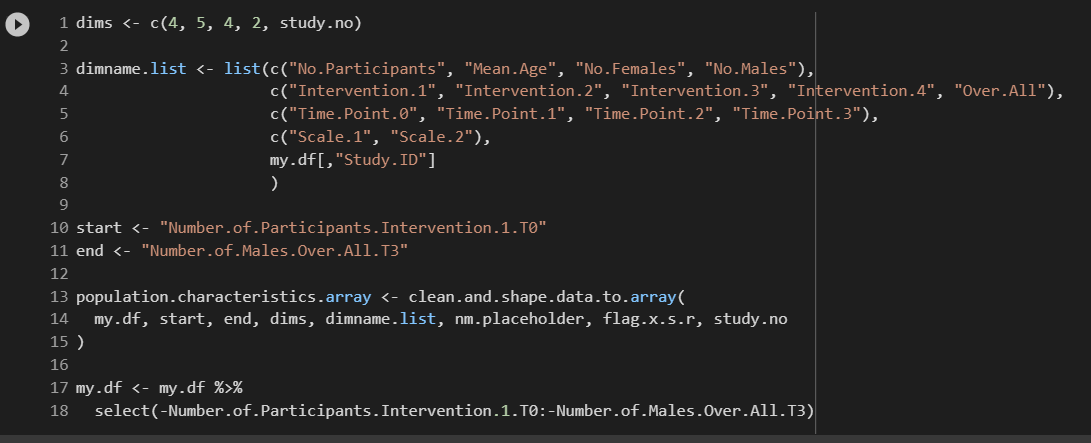

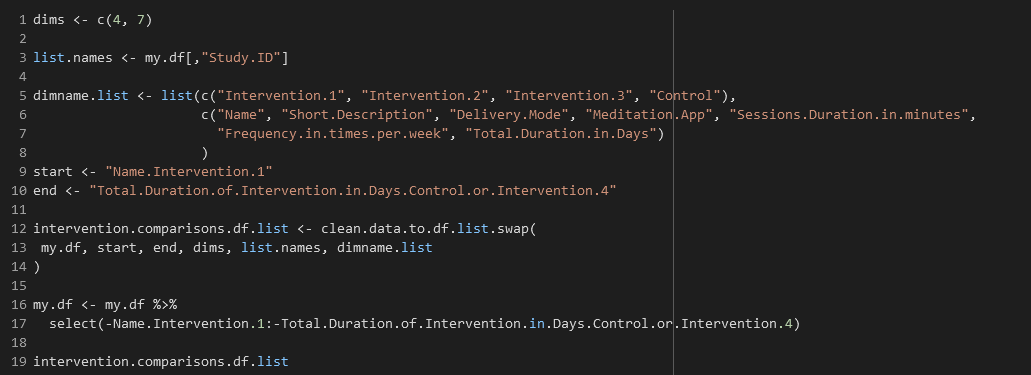

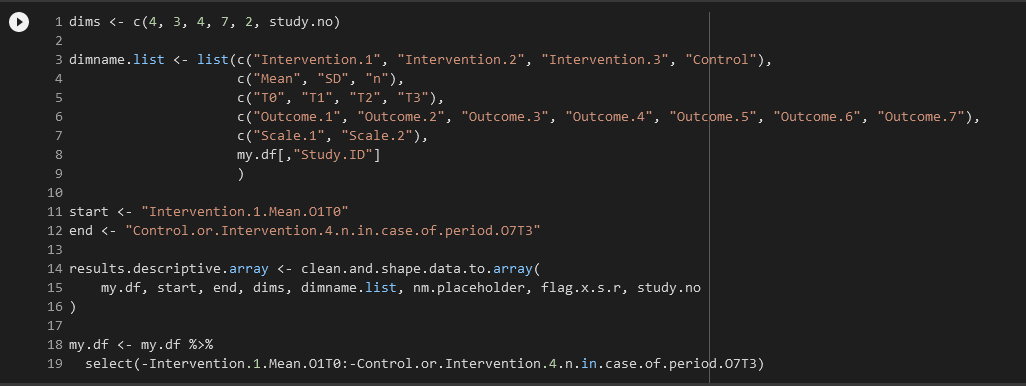

## Put total data into a list

In [ ]:
m.data.list <- list(
    one.D.info.df,
    population.characteristics.array,
    intervention.comparisons.df.list,
    dates.measuring.time.points.df.list,
    between.T.duration.df.list,
    outcome.definitions.df.list,
    outcome.measures.df.list,
    results.descriptive.array,
    results.quantitative.array,
    results.qualitative.df.list
)

names(m.data.list) <- c(
    "one.D.info.df",
    "population.characteristics.array",
    "intervention.comparisons.df.list",
    "dates.measuring.time.points.df.list",
    "between.T.duration.df.list",
    "outcome.definitions.df.list",
    "outcome.measures.df.list",
    "results.descriptive.array",
    "results.quantitative.array",
    "results.qualitative.df.list"
)

## Create data arrays clustered by outcome

### Functions

#### Get outcome data to array?

In [ ]:
get.outcome.data.to.array <- function(one.D.info.df, outcome){
  study.names.vec <- c()
  outcome.no.vec <- c()
  for (study in 1:study.no){
    for (outcome.no in 1:7){
      if (one.D.info.df[study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome){
        append(study.names.vec, my.df[study,"Study.ID"])
        append(outcome.no.vec, outcome.no)
      }
    }
  }
  # get
  # Definition,
  # Scale(s),
  # Results.Descriptive,
  # Results.Quantitative,
  # Results.Qualititive
}

### create outcome data arrays?



#### Stress

## Make scale and meditation type names unique

In [ ]:
meditation.types <- c()

colnames.med.type <- colnames(one.D.info.df)[41:44]

for (colname.med.type in colnames.med.type) {
  for (meditation.type in one.D.info.df[,colname.med.type]){
    if (!meditation.type == "NA"){
      meditation.types <- append(meditation.types, meditation.type)
    }
  }
}

unique.meditation.types <- unique(meditation.types)
unique.meditation.types
# categorize these types

[1] "Breathing Exercise (no further Info)"                                                                                                                                                                                                                                                                                                                                                    
 [2] "Transcendental Meditation (TM)"                                                                                                                                                                                                                                                                                                                                                          
 [3] "Body Scan; Breathing Exercise (no further Info)"                                                                                                                                                                                                                                                                                                                                         
 [4] "Breathing Exercise (no further Info); Only \"Mindfulness Meditation\" named"                                                                                                                                                                                                                                                                                                             
 [5] "Only \"Mindfulness Meditation\" named"                                                                                                                                                                                                                                                                                                                                                   
 [6] "Mantra Meditation"                                                                                                                                                                                                                                                                                                                                                                       
 [7] "Body Scan"                                                                                                                                                                                                                                                                                                                                                                               
 [8] "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions"
 [9] "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells"                                                                                                                                                                                                                                                                                  
[10] "Other: mindfulness-based exercises through audio video or text files, grounding visualization, gratitude, imagining the life you want, finding meaning"                                                                                                                                                                                                                                  
[11] "Body Scan; Breathing Exercise (no further Info); Loving-Kindness Meditation"                                                                               

In [ ]:
outcome.measures.df.list

$`Ratanasiripong 2015`
                                                                                                             Measures.Name
Outcome.1                                                Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)
Outcome.2 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)
Outcome.3                                                                                                             <NA>
Outcome.4                                                                                                             <NA>
Outcome.5                                                                                                             <NA>
Outcome.6                                                                                                             <NA>
Outcome.7                                                                                                             <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                  NA                          NA
Outcome.3                  NA                          NA
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Sloan 2016`
                             Measures.Name Start.and.End.Point
Outcome.1 The Perceived Stress Scale (PSS)              0 - 40
Outcome.2                             <NA>                <NA>
Outcome.3                             <NA>                <NA>
Outcome.4                             <NA>                <NA>
Outcome.5                             <NA>                <NA>
Outcome.6                             <NA>                <NA>
Outcome.7                             <NA>                <NA>
          High.or.low.means.resilient
Outcome.1                           v
Outcome.2                        <NA>
Outcome.3                        <NA>
Outcome.4                        <NA>
Outcome.5                        <NA>
Outcome.6                        <NA>
Outcome.7                        <NA>

$`Nidich 2009`
                                                        Measures.Name
Outcome.1 Profile of Mood States total mood disturbance main scale 23
Outcome.2                     Profile of Mood States anxiety subscale
Outcome.3                  Profile of Mood States depression subscale
Outcome.4                                                        <NA>
Outcome.5                                                        <NA>
Outcome.6                                                        <NA>
Outcome.7                                                        <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                -999                        -999
Outcome.3                -999                        -999
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Barry 2019`
                                                                                Measures.Name
Outcome.1                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.2                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.3 Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28
Outcome.4                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.5                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.6                                       Psychological Capital\nQuestionnaire (P

In [ ]:
measures <- c()

for (outcome.measures.df in outcome.measures.df.list) {
  for (outcome.measure in outcome.measures.df[,"Measures.Name"]){
    if (!(is.na(outcome.measure) | outcome.measure == "NA" | outcome.measure == nm.placeholder)){
      if (multiple.commas.present(outcome.measure)){
        cat("multiple commas in: ", outcome.measure, "\n")
      }
      measures <- append(measures, outcome.measure)
    }
  }
}

unique.measures <- unique(measures)
measures

# set unique names for each measure

multiple commas in:  Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in:  State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983) 
multiple commas in:  Depression, Anxiety
and Stress Scale (DASS) 26, Perceived Stress Scale
(PSS)27,28 
multiple commas in:  Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007) 
multiple commas in:  Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in:  The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983) 
multiple commas in:  Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006) 
multiple commas in:  Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978) 
multiple commas in:  Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in:  Depression, Anxiety, and Stress Scale – 21 (DAS

[1] "Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)"                                                                    
 [2] "State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)"                     
 [3] "The Perceived Stress Scale (PSS)"                                                                                                     
 [4] "Profile of Mood States total mood disturbance main scale 23"                                                                          
 [5] "Profile of Mood States anxiety subscale"                                                                                              
 [6] "Profile of Mood States depression subscale"                                                                                           
 [7] "Depression, Anxiety\nand Stress Scale (DASS) 26"                                                                                      
 [8] "Depression, Anxiety\nand Stress Scale (DASS) 26"                                                                                      
 [9] "Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28"                                                  
[10] "Psychological Capital\nQuestionnaire (PCQ) 19"                                                                                        
[11] "Psychological Capital\nQuestionnaire (PCQ) 19"                                                                                        
[12] "Psychological Capital\nQuestionnaire (PCQ) 19"                                                                                        
[13] "Psychological Capital\nQuestionnaire (PCQ) 19"                                                                                        
[14] "Self-Rating Anxiety Scale (SAS) (Zung, 1971)"                                                                                         
[15] "Self-Rating Depression Scale (SDS) (Zung et al., 1965)"                                                                               
[16] "Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS) - Stress Subcale"                                            
[17] "Depression Anxiety and Stress Scale (DASS) - Depression Subcale"                                                                      
[18] "Depression Anxiety and Stress Scale (DASS) - Anxiety Subcale"                                                                         
[19] "Mindfulness Attention Awareness Scale (MAAS) (Brown and Ryan (2003)"                                                                  
[20] "Perceived Stress Scale (PSS).16"                                                                                                      
[21] "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R)"                                                                           
[22] "World Health Organization Quality of Life-Brief (WHO-QOL-BREF)"                                                                       
[23] "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R) - acceptace subscale"                                                      
[24] "scales adapted from a\nwell-known set of brief measures developed by the Fetzer Institute (1999, pp. 86–87) - positve coping subscale"
[25] "Satisfaction with Life Scale (SWLS [71])"                                                                                             
[26] "Beck Depression Inventory (BDI [72])"                                                                                                 
[27] "erceived Stress Scale (PSS [74])"                                                                                                     
[28] "The Toronto Mindfulness Scale (TMS)"                                                                                                  
[29] "State-Trait Anxiety Inventory (STAI)"          

# Plot Forestplosts

## Functions

### Print forest plot clustered by outcome and meditation type

In [ ]:
# filter data directly out of m.data.list into forst.plot function
# ...clustered by outcome and meditation type

forest.plt.by.outcome..med.type <- function(
  outcome, meditation.type, m.data.list, time.point, scale
  ){
  for (study in 1:study.no){
    study.names.vec <- c()
    outcome.no.vec <- c() # notwendig?
    means.int.vec <- c()
    means.control.vec <- c()
    sds.int.vec <- c()
    sds.control.vec <- c()
    n.int.vec <- c()
    n.control.vec <- c()
    for (study in 1:study.no){
      for (outcome.no in 1:7){
        if (m.data.list[["one.D.info.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome){
          append(
            study.names.vec,
            m.data.list[["one.D.info.df"]][study,"Study.ID"]
            )
          append(
            outcome.no.vec
            , outcome.no
            )
          append(
            means.int.vec,
            m.data.list[["results.quantitative"]][######]
            )
          append(
            means.control.vec,
            m.data.list[["results.quantitative"]][######]
            )
          append(
            sds.int.vec,
            m.data.list[["results.quantitative"]][######]
            )
          append(
            sds.control.vec,
            m.data.list[["results.quantitative"]][######]
            )
          append(
            n.int.vec,
            )
          append(
            n.control.vec,
            )
        }
      }
    }
  }
  forest.plot(
    # pass above vectors
  )
  # print inserted data to check it
}

ERROR: ignored

# Notes

- Different Scales
    - 2 Array-Dims with same values
    - Results in Dim "Scale.2" only if 2nd scale is present, else: NA

- Ignore 2nd scale entry for Sloan 2016 

# ToDo

- find solution for
  - value: '3.79 during intervention, 2.04 during follow-up mean' in "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"
  - multiple commas in measures name
- find a way to combine 1st measures name with Scales name in results
- categorize meditation types
- fill empty n, mean age, and sex values
  - find solution for errors and insert n in results.descriptive.array[intervention, "n", t, outcome, scale, study]
- set unique names for each measure


# Array Dims and Dimnames

Dates of Measuring Time Points
	4 x 1
	c("Time.Point.0", "Time.Point.1", "Time.Point.2", "Time.Point.3")
	c("Date")
	Time.Point.0.Date:Time.Point.3.Date
	
Between-Measuring Time Points' Duration
	3 x 1
	c("Time.Point.0...1", "Time.Point.0...2", "Time.Point.0...3")
	c("Duration.in.Days")
	Time.Point.0...1:Duration.in.Days

Intervention and Comparisons
	7 x 4
	c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes", Frequency.in.times.per.week", "Total.Duration.in.Days")
	c("Intervention.1", "Intervention.2", "Intervention.3", "Control")
	Name.Intervention 1:Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4

Definition of Outcomes
	7 x 1
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("Definition")
	Outcome.1:Definition

Measures of Outcomes
	7 x 3
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
	Outcome.1.Scale.s.or.other.Measure.s.Name:Outcome.7.High.or.low.means.resilient
	
Means and SDs of Outcomes
	4 x 3 x 4 x 7
	c("Intervention.1", "Intervention.2", "Intervention.3", "Control"
	c("Mean", "SD", "n")
	c("T0", "T1", "T2", "T3")
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	Intervention.1.Mean.O1T0:Control.or.Intervention.4.n.in.case.of.period.O7T3

Quantitative Results of Data Analyses
	7 x 3 x 3 x 6
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("P.Value", "Effect.Size", "Effect.Size.CI")
	c("T1", "T2", "T3")
	c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4")
	Outcome.1.P.Value.1x2T1:Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3

Qualitative Results of Data Analyses
	7 x 3
	c("Key.Theme.1", "Key.Theme.2", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7")
	c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
	Key.Theme.1:Results